# Generating SEM-Like Images


## Introduction

This notebook shows how our computer vision models can be used to generate (SEMulate) SEM-like images of the predicted device geometries. Unlike the other notebook examples in our docs, **there is no utility here,** but it is a fun application of our computer vision models. We'll go through the following steps:

1. Preparing a test device for prediction
2. Executing a prediction
3. Generating an SEM-like image

To begin, we need to import the necessary libraries:


In [1]:
import prefab as pf

## Loading a device


In this tutorial, we'll use an L-grating structure, but feel free to explore other structures available in the `shapes` module, or load your own from a GDS file.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

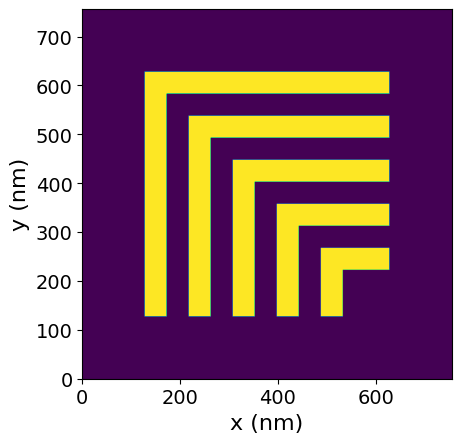

In [2]:
device = pf.shapes.L_grating(height=500, pitch=90)
device.plot(show_buffer=False)

## Predicting a device


We'll run our prediction just like we did in the previous [tutorial](./1_prediction.ipynb). Note how the small gaps between the L-grating arms are highly uncertain in the raw prediction and get partially filled in by the binarization step. As expected, there is also significant rounding at the corners of the L-grating arms.


> **Note:** Initial prediction/correction may take longer due to server startup and model loading. Subsequent predictions should be quicker.


Prediction: 100%|██████████████████████████████| 100/100 [00:02<00:00, 44.07%/s]


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

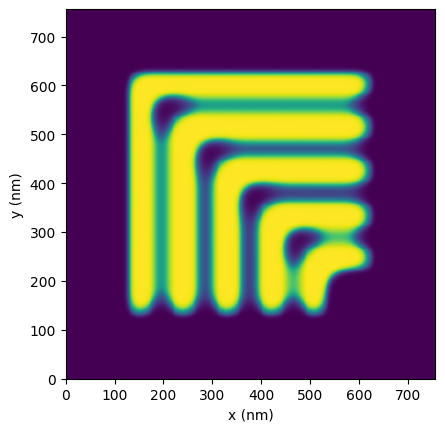

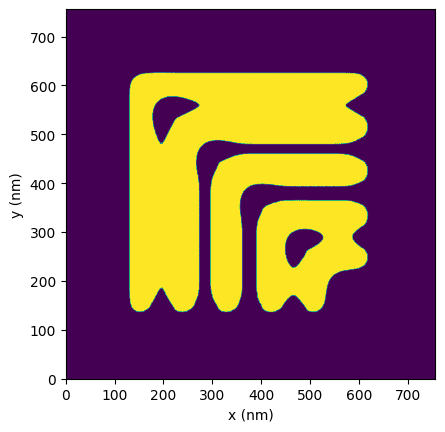

In [35]:
MODEL_NAME = "ANT_NanoSOI_ANF1_d10"
prediction = device.predict(model=pf.models[MODEL_NAME])
prediction_bin = prediction.binarize()

prediction.plot(show_buffer=False)
prediction_bin.plot(show_buffer=False)

## Generating an SEM-like image

We are exploring a feature that uses varying threshold levels around the edges of the prediction. Although *this method is not yet fully validated*, it shows promise in producing more realistic images that display bumps and roughness along the sidewalls of the fabricated devices. While this is primarily for aesthetic purposes in this tutorial, we believe it will be useful in assessing the robustness to edge defects in the fabrication process. This is an active area of research, and we welcome any feedback and suggestions.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

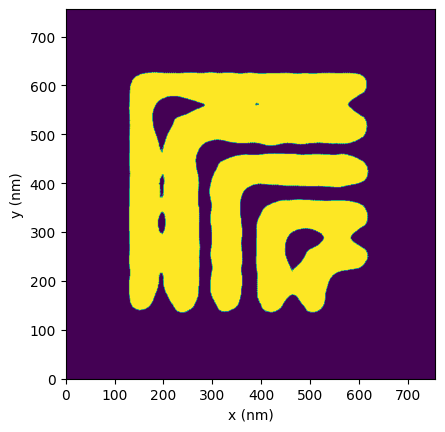

In [49]:
prediction_bin_rng = prediction.binarize_monte_carlo(
    threshold_noise_std=2, threshold_blur_std=10
)
prediction_bin_rng.plot(show_buffer=False)

Lastly, we can generate an SEM-like image of the randomly thresholded prediction using the `semulate` method and specifying the artificial nanofabrication model for the process we used to create the prediction.

SEMulate: 100%|██████████████████████████████| 100/100 [00:02<00:00, 37.29%/s]


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

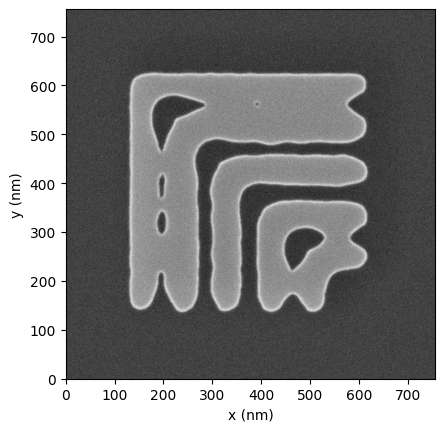

In [50]:
sem = prediction_bin_rng.semulate(pf.models["ANT_NanoSOI_ANF1_d10"])
sem.plot(show_buffer=False, cmap="gray")

Of course, SEM styling is influenced by various factors, including the fabrication process, the specific SEM equipment used, and the expertise of the operator. While these generated images are not intended to replace actual SEM imaging, they demonstrate a compelling alternative application of our computer vision models.